In [113]:
import pycaret
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import warnings

#  DATA PREPARATION

# OPEN THE CSV FILE

In [114]:

# Read the CSV file into a DataFrame
hotel_data = pd.read_csv('hotel_booking_cleaned_no_country.csv')
hotel_data

,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...
9694,Direct,0,2,No Deposit,0,Transient-Party,A,1,1,0
9695,Online TA,0,0,No Deposit,0,Transient-Party,C,0,2,0
9696,Groups,0,0,No Deposit,0,Transient-Party,A,0,1,0
9697,Online TA,0,0,No Deposit,0,Transient,B,0,0,0


In [115]:
hotel_data.columns

Index(['market_segment', 'previous_cancellations', 'booking_changes',
       'deposit_type', 'days_in_waiting_list', 'customer_type',
       'reserved_room_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_canceled'],
      dtype='object')

# Correlation Matrix 


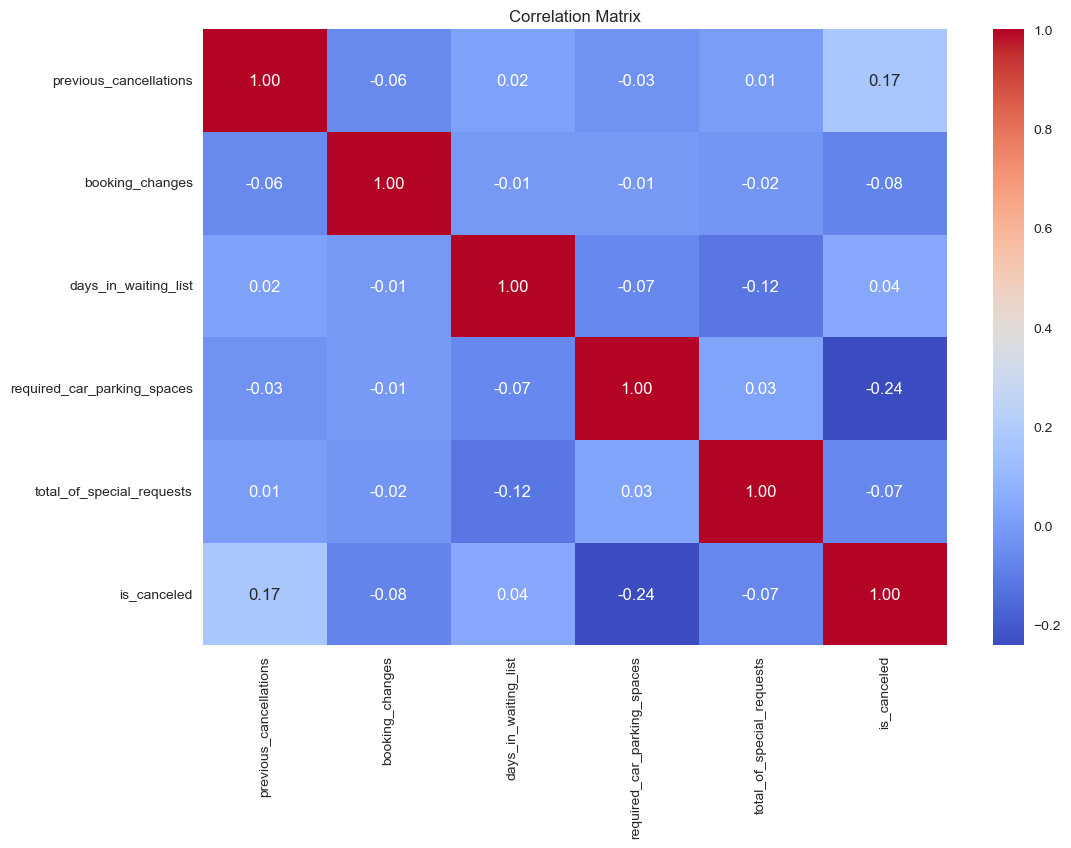

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns


# Correlation Matrix
correlation_matrix = hotel_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")

# Show the plots
plt.show()


## one hot encoder

In [117]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Creating a copy of the dataset for transformations
transformed_data = hotel_data.copy()

# Label Encoding for 'country'
le_country = LabelEncoder()

# One-Hot Encoding for the remaining categorical columns
categorical_columns = ['market_segment', 'deposit_type', 'customer_type', 'reserved_room_type']
transformed_data = pd.get_dummies(transformed_data, columns=categorical_columns, drop_first=True)

# Display the transformed data
transformed_data.head()


,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,...,customer_type_Transient-Party,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


the data has been changed into binary.

## Scaling

In [118]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to be scaled
numerical_columns = ['previous_cancellations', 'booking_changes', 
                     'days_in_waiting_list', 'required_car_parking_spaces', 
                     'total_of_special_requests']

# Applying Standard Scaler
scaler = StandardScaler()
hotel_data[numerical_columns] = scaler.fit_transform(transformed_data[numerical_columns])

# Display the scaled data
transformed_data.head()


,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,...,customer_type_Transient-Party,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


__insight__

scalling has been successfully aplied. 

## check distribusi cancelled vs non cancelled

In [119]:
# Check the distribution of the 'is_canceled' target variable
target_distribution = transformed_data['is_canceled'].value_counts(normalize=True)
target_distribution


0    0.763068
1    0.236932
Name: is_canceled, dtype: float64

__insight__

the distribution is bit skewed to the right lets try some methods to fix it.

## IMBALANCE method

In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Definisikan fitur dan target
X = transformed_data.drop('is_canceled', axis=1)
y = transformed_data['is_canceled']

# Memisahkan data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi SMOTE
smote = SMOTE()

# Balancing data training dengan SMOTE
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Mengecek distribusi baru dari variabel target setelah resampling
new_target_distribution = pd.Series(y_train_balanced).value_counts(normalize=True)
new_target_distribution


0    0.5
1    0.5
Name: is_canceled, dtype: float64

# MAKING PIPELINE

In [158]:
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

# Assuming numerical_features and categorical_features are lists of your column names
numerical_features = ['previous_cancellations', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']
categorical_features = ['market_segment', 'deposit_type', 'customer_type', 'reserved_room_type']  

# Transformer for numerical features
numerical_transformer = StandardScaler()

# Transformer for categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Preprocessor that combines transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create LightGBM model
lgbm = lgb.LGBMClassifier(random_state=42)

# Create pipeline with SMOTE
pipeline = make_pipeline(
    preprocessor,
    SMOTE(),
    lgbm
)

pipeline

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['previous_cancellations',
                                                   'booking_changes',
                                                   'days_in_waiting_list',
                                                   'required_car_parking_spaces',
                                                   'total_of_special_requests']),
                                                 ('cat...
                 

__insight__

Pipeline has been created.

## resample

In [122]:
from sklearn.utils import resample

# Separate the dataset into the majority and minority classes
majority_class = transformed_data[transformed_data['is_canceled'] == 0]
minority_class = transformed_data[transformed_data['is_canceled'] == 1]

# Upsample the minority class
minority_upsampled = resample(minority_class,
                              replace=True,  # Sample with replacement
                              n_samples=len(majority_class),  # Match number in majority class
                              random_state=42)  # Reproducible results

# Combine the majority class with the upsampled minority class
upsampled_data = pd.concat([majority_class, minority_upsampled])

# Check the new distribution of the target variable
upsampled_target_distribution = upsampled_data['is_canceled'].value_counts(normalize=True)
upsampled_target_distribution


0    0.5
1    0.5
Name: is_canceled, dtype: float64

__insight__

both method has make the amount of sampling more balanced by giving them same amount of 50:50. 

## comparison between models using Pycaret

In this  part we will find models that give best result for the classification. 

In [123]:
from pycaret.classification import setup, compare_models

# Assuming 'data' is your DataFrame and 'target' is the target variable
# Exclude the 'excluded_column' from the modeling process
setup(hotel_data, ignore_features=['country'])

# Now you can proceed with other PyCaret functions, such as compare_models
best_model = compare_models()


,Description,Value
0,Session id,7519
1,Target,is_canceled
2,Target type,Binary
3,Original data shape,"(9699, 10)"
4,Transformed data shape,"(9699, 31)"
5,Transformed train set shape,"(6789, 31)"
6,Transformed test set shape,"(2910, 31)"
7,Ignore features,1
8,Numeric features,5
9,Categorical features,4


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7973,0.8183,0.2735,0.6813,0.3895,0.2939,0.3383,0.1110
ada,Ada Boost Classifier,0.7939,0.8141,0.2934,0.6433,0.4024,0.2985,0.3323,0.0790
lightgbm,Light Gradient Boosting Machine,0.7929,0.8071,0.3120,0.6270,0.4151,0.3067,0.3348,0.2660
lr,Logistic Regression,0.7926,0.8101,0.2797,0.6443,0.3892,0.2873,0.3240,2.1100
lda,Linear Discriminant Analysis,0.7891,0.8042,0.1914,0.7041,0.3001,0.2214,0.2874,0.0370
ridge,Ridge Classifier,0.7875,0.0000,0.1454,0.7746,0.2442,0.1834,0.2722,0.0320
svm,SVM - Linear Kernel,0.7866,0.0000,0.1566,0.7578,0.2551,0.1894,0.2726,0.0460
et,Extra Trees Classifier,0.7755,0.7524,0.3263,0.5446,0.4065,0.2792,0.2937,0.0980
dt,Decision Tree Classifier,0.7746,0.7468,0.3257,0.5409,0.4052,0.2771,0.2912,0.0370
rf,Random Forest Classifier,0.7726,0.7666,0.3394,0.5322,0.4135,0.2812,0.2926,0.1190


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

__insight__

The 3 models that we are use are lightgbm, ada and GBC.

## logistic regression dan visualisasi

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Defining features and target for the upsampled data
X_upsampled = upsampled_data.drop('is_canceled', axis=1)
y_upsampled = upsampled_data['is_canceled']

# Splitting the upsampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, classification_rep, conf_matrix


(0.7338437288898897,
 '              precision    recall  f1-score   support\n\n           0       0.76      0.68      0.72      2225\n           1       0.71      0.78      0.75      2216\n\n    accuracy                           0.73      4441\n   macro avg       0.74      0.73      0.73      4441\nweighted avg       0.74      0.73      0.73      4441\n',
 array([[1522,  703],
        [ 479, 1737]], dtype=int64))

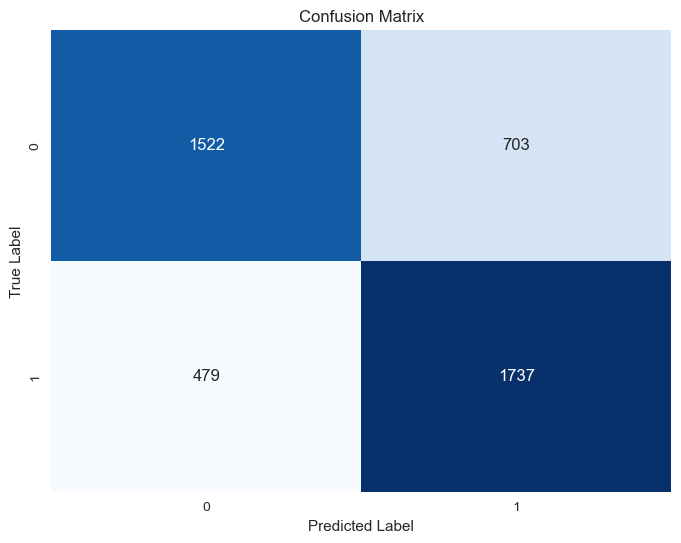

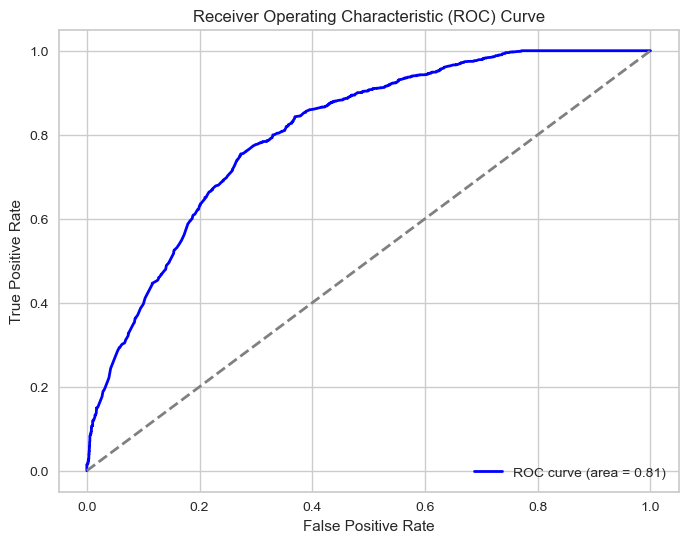

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculating ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


__insight__

 the accuration of the model is 73 percent, recall is quite efficient and precision and also F1 score is quite good on differentiate classess

## GBM dan visualisasi

In [126]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(random_state=42)

from sklearn.model_selection import train_test_split

# Asumsikan X adalah fitur dan y adalah target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
gbm.fit(X_train, y_train)

# Predictions on the test set
y_pred_gbm = gbm.predict(X_test)

# Evaluating the model
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
classification_rep_gbm = classification_report(y_test, y_pred_gbm)
conf_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)

accuracy_gbm, classification_rep_gbm, conf_matrix_gbm


(0.7845360824742268,
 '              precision    recall  f1-score   support\n\n           0       0.80      0.95      0.87      1456\n           1       0.66      0.28      0.39       484\n\n    accuracy                           0.78      1940\n   macro avg       0.73      0.62      0.63      1940\nweighted avg       0.76      0.78      0.75      1940\n',
 array([[1386,   70],
        [ 348,  136]], dtype=int64))

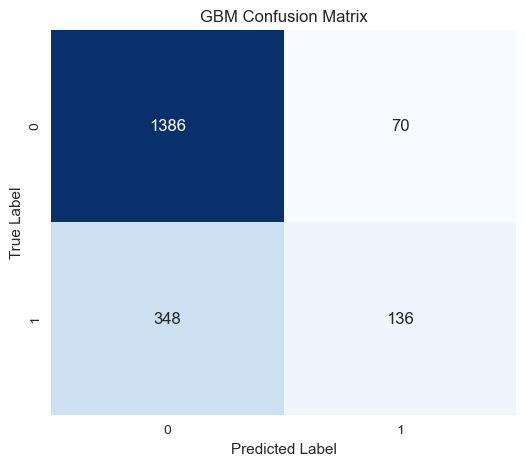

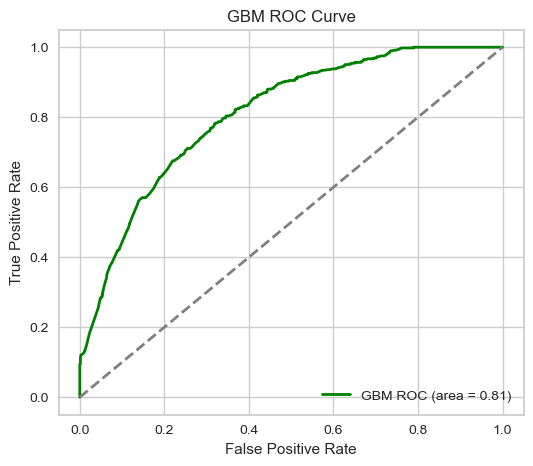

In [127]:
fpr_gbm, tpr_gbm, thresholds_gbm = roc_curve(y_test, gbm.predict_proba(X_test)[:, 1])
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)

# Plotting Confusion Matrix for GBM
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_gbm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('GBM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Plotting ROC Curve for GBM
plt.figure(figsize=(6, 5))
plt.plot(fpr_gbm, tpr_gbm, color='green', lw=2, label='GBM ROC (area = %0.2f)' % roc_auc_gbm)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GBM ROC Curve')
plt.legend(loc='lower right')
plt.show()



__insight__ 

. GBM model showed high level of accuracy(78). recall is quite high for cancelled, showing the eficiency of the model.  the precision and f1-score showed ability of the model to differentiate the classess. 

## LIGHT GBM MODELING

In [128]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Asumsikan X adalah fitur dan y adalah target
# Pastikan X dan y telah didefinisikan sebelumnya di kode Anda

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the LightGBM Classifier
lgbm_model = lgb.LGBMClassifier(random_state=42)

# Train the model
lgbm_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluating the model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
classification_rep_lgbm = classification_report(y_test, y_pred_lgbm)
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)

print (accuracy_lgbm), 
print (classification_rep_lgbm), 
print (conf_matrix_lgbm)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1814, number of negative: 5945
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000385 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 7759, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.233793 -> initscore=-1.187016
[LightGBM] [Info] Start training from score -1.187016
0.777319587628866
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1456
           1       0.61      0.29      0.40       484

    accuracy                           0.78      1940
   macro avg       0.71      0.62      0.63      1940
weighted avg       0.75      0.78      0.75      1940

[[1366   90]
 [ 342  1

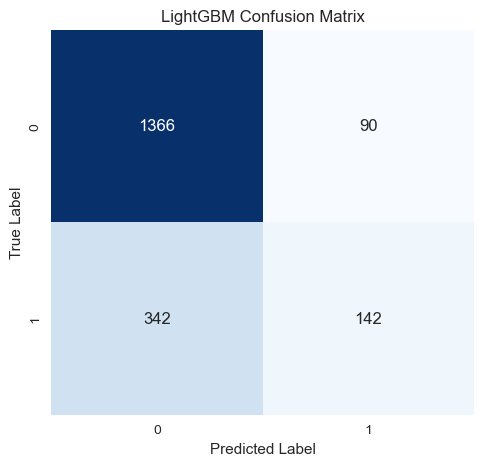

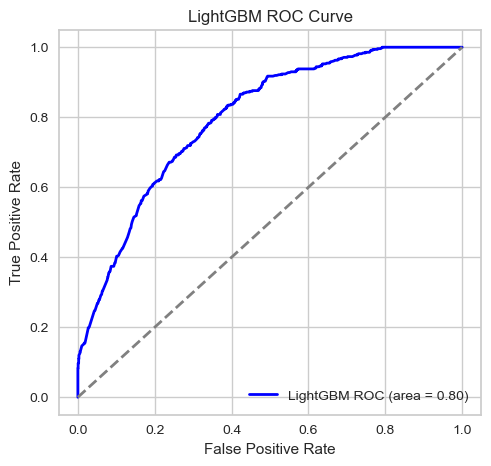

In [129]:
from sklearn.metrics import roc_curve, auc

# Calculating ROC Curve and AUC for LightGBM
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_test, lgbm_model.predict_proba(X_test)[:, 1])
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)


# Plotting Confusion Matrix for LightGBM
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_lgbm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('LightGBM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')



# Plotting ROC Curve for LightGBM
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_lgbm, tpr_lgbm, color='blue', lw=2, label='LightGBM ROC (area = %0.2f)' % roc_auc_lgbm)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LightGBM ROC Curve')
plt.legend(loc='lower right')



__INSIGHT__

The model is better at predicting class 0 than class 1, as indicated by higher precision, recall, and F1-score for class 0.
The model has a high number of false negatives for class 1, which results in a low recall for that class.
The accuracy of the model is reasonably high at 
0.78
0.78, but since the dataset is imbalanced (more instances of class 0 than class 1), accuracy is not the best metric to rely on alone.
The relatively low F1-score for class 1 (
0.40
0.40) indicates that the model is not performing as well on the minority class, which is often a challenge in imbalanced datasets.


## ADA BOOST 

In [130]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Asumsikan X adalah fitur dan y adalah target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat classifier dasar (misalnya, Decision Tree)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Membuat model AdaBoost
ada_boost_model = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=100, random_state=42)

# Melatih model dengan data pelatihan
ada_boost_model.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred_ada = ada_boost_model.predict(X_test)

# Evaluasi model
accuracy_ada = accuracy_score(y_test, y_pred_ada)
classification_rep_ada = classification_report(y_test, y_pred_ada)
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)

print("Akurasi:", accuracy_ada)
print("\nLaporan Klasifikasi:\n", classification_rep_ada)
print("\nMatriks Kebingungan:\n", conf_matrix_ada)


Akurasi: 0.7829896907216495

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.80      0.94      0.87      1456
           1       0.64      0.30      0.41       484

    accuracy                           0.78      1940
   macro avg       0.72      0.62      0.64      1940
weighted avg       0.76      0.78      0.75      1940


Matriks Kebingungan:
 [[1372   84]
 [ 337  147]]


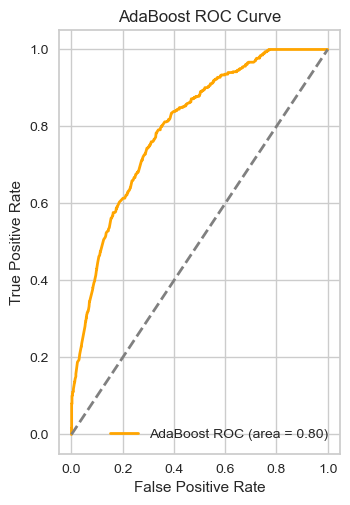

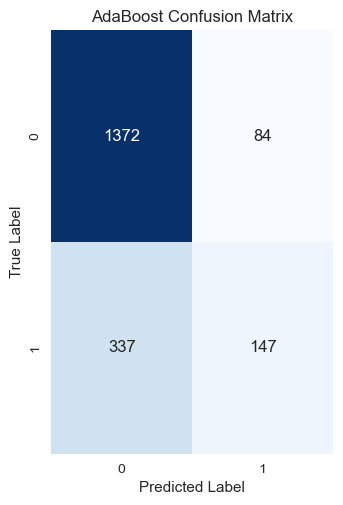

In [131]:

# Calculating ROC Curve and AUC for AdaBoost
fpr_ada, tpr_ada, thresholds_ada = roc_curve(y_test, ada_boost_model.predict_proba(X_test)[:, 1])
roc_auc_ada = auc(fpr_ada, tpr_ada)

# Plotting ROC Curve for AdaBoost
plt.subplot(1, 2, 2)
plt.plot(fpr_ada, tpr_ada, color='orange', lw=2, label='AdaBoost ROC (area = %0.2f)' % roc_auc_ada)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Plotting Confusion Matrix for AdaBoost
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_ada, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('AdaBoost Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

__insight__

The overall picture indicates that the model performs well in identifying class 0, but it struggles with class 1, as indicated by the lower recall and F1-score for class 1. The accuracy of the model is decent, but the imbalance between the classes is evident, and it affects the performance metrics for class 1. The confusion matrix supports this observation, showing a significant number of false negatives for class 1, meaning many class 1 instances were incorrectly predicted as class 0.







### Conclusion

SO we will use 4   models which are  light GBM ,ada and GBM to be used on hyperparameters tuning

# MODELING HYPERPARAMETER

In this part we will determine the best model by using hyperparameter tuning it. There are 4 models that we are going to try.


## logistic regression`

In [132]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # These solvers work with l1 penalty
}

# Create a GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Find the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


Fitting 5 folds for each of 24 candidates, totalling 120 fits


({'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}, 0.8093671841865246)

__insight__
C (Regularisasi): 10
Penalty (Jenis Regularisasi): l1
Solver: liblinear

highest AUC Score through Grid Search is 0.815, which shows the increase of quality through this parameter.

__insight__
Activation function: 'tanh'
Alpha (regularization parameter): 0.001
Hidden Layer Sizes: (100,)
The corresponding best score (roc_auc) is approximately 0.8314.

# Gradient Boosting Method

In [133]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for GBM
gbm_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Create a GridSearchCV object for GBM
gbm_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                               gbm_param_grid, 
                               cv=5, 
                               scoring='roc_auc', 
                               verbose=1, 
                               n_jobs=-1)

# Perform the grid search on the training data
gbm_grid_search.fit(X_train, y_train)

# Find the best parameters and the best score for GBM
gbm_best_params = gbm_grid_search.best_params_
gbm_best_score = gbm_grid_search.best_score_

gbm_best_params, gbm_best_score


Fitting 5 folds for each of 32 candidates, totalling 160 fits


({'learning_rate': 0.1,
  'max_depth': 3,
  'min_samples_leaf': 1,
  'min_samples_split': 4,
  'n_estimators': 100},
 0.8171848316788394)

it seems the highest rate after hyperparameter tuning is  81.71 %. which is increase about 2 percent

## ADA BOOST

In [134]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Membuat classifier dasar (misalnya, Decision Tree)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Tentukan grid parameter untuk AdaBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'base_estimator__max_depth': [1, 2, 3]  # Jika Anda ingin men-tuning base estimator
}

# Membuat model AdaBoost dengan base classifier
ada_boost = AdaBoostClassifier(base_estimator=base_classifier, random_state=42)

# Mengatur GridSearchCV
grid_search = GridSearchCV(ada_boost, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)

# Melakukan grid search
grid_search.fit(X_train, y_train)

# Menemukan parameter terbaik dan skor terbaik
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params
best_score

Fitting 5 folds for each of 27 candidates, totalling 135 fits


0.8165567491717673

__insight__

Highest score is 0.8165

## LIGHT BGM

In [135]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Tentukan grid parameter untuk LightGBM
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'num_leaves': [31, 50, 100],
    'max_depth': [3, 5, -1],  # -1 means no limit
    'min_child_samples': [20, 50, 100]
}

# Membuat model LightGBM
lgbm = lgb.LGBMClassifier(random_state=42)

# Mengatur GridSearchCV
grid_search = GridSearchCV(lgbm, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)

# Melakukan grid search
grid_search.fit(X_train, y_train)

# Menemukan parameter terbaik dan skor terbaik
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_params
best_score

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1814, number of negative: 5945
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 7759, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.233793 -> initscore=-1.187016
[LightGBM] [Info] Start training from score -1.187016
[LightGBM] [Warning] No further splits with

0.8193561907089434

the score is 82 percent. this is the highest score among 4 of them 

Pipeline is already created 

## MAKING LEARNING CURVE FOR LBGM

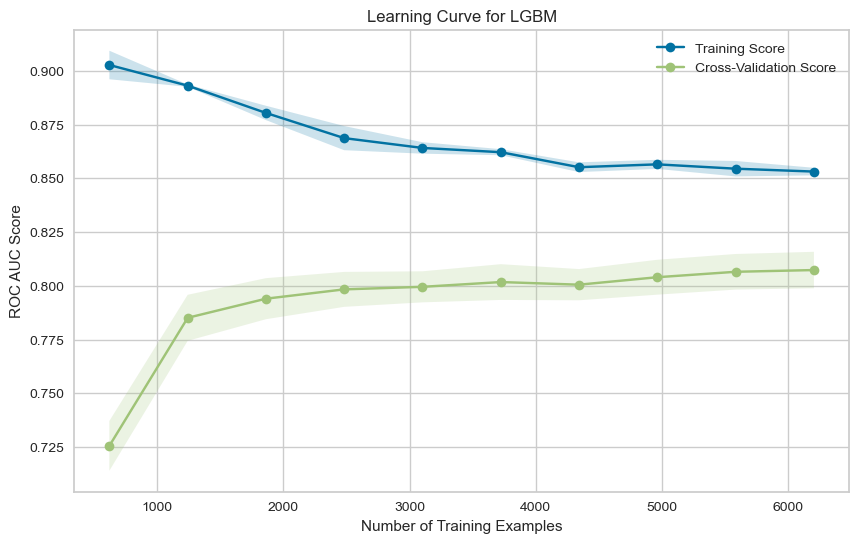

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Assume you already have a trained GBM model (gbm_model) and your training data (X_train, y_train)

# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(
   lgb.LGBMClassifier(learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.9, random_state=42),
    X_train, y_train, cv=5, scoring='roc_auc', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, marker='o', label='Training Score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)

plt.plot(train_sizes, test_mean, marker='o', label='Cross-Validation Score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

plt.title('Learning Curve for LGBM')
plt.xlabel('Number of Training Examples')
plt.ylabel('ROC AUC Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()


__insight__ 

the LGBM model's performance improves as more data is used for training, up to a point. Both the training and validation scores are relatively high, suggesting that the model is performing well and has a good balance between bias and variance.

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import lightgbm as lgb

# Menggunakan parameter terbaik dari hasil hyperparameter tuning (jika ada)
# Jika tidak, gunakan parameter default
lgbm_model = lgb.LGBMClassifier(random_state=42)

# Tentukan ukuran training set yang akan digunakan untuk membuat learning curve
train_sizes = np.linspace(0.1, 1.0, 10)

train_sizes, train_scores, test_scores = learning_curve(
    lgbm_model, X, y, cv=5, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

print (train_scores_mean)
print (train_scores_std)
print (test_scores_mean)
print (test_scores_std)

[0.79845161 0.81237911 0.80825097 0.80534966 0.80763083 0.80592911
 0.80714417 0.80666989 0.80481169 0.80389225]
[0.00206452 0.00128949 0.00240653 0.00237694 0.00349467 0.00245913
 0.00121357 0.0013207  0.00123854 0.00125381]
[0.77678147 0.78420442 0.78203873 0.78265787 0.78987532 0.78925676
 0.78832861 0.79173104 0.7924528  0.79368975]
[0.01200259 0.00358816 0.00766054 0.00506252 0.00437729 0.00659174
 0.00556047 0.00488171 0.00461852 0.00590994]


__insight__

From the values given, it seems that the model has a relatively consistent performance on both the training and test sets as more data is added. The mean scores are converging, suggesting that the model is generalizing reasonably well. The standard deviations are quite small, indicating that the results are stable across different training set sizes.

In [138]:
# Membuat model LGBM dengan parameter terbaik dari grid search
lgbm = lgb.LGBMClassifier( random_state=42)

# Melatih model dengan data pelatihan
lgbm_model.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred = lgbm_model.predict(X_test)

# Evaluasi model
from sklearn.metrics import classification_report, accuracy_score

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1814, number of negative: 5945
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 7759, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.233793 -> initscore=-1.187016
[LightGBM] [Info] Start training from score -1.187016
Akurasi: 0.777319587628866

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86      1456
           1       0.61      0.29      0.40       484

    accuracy                           0.78      1940
   macro avg       0.71      0.62      0.63      1940
weighted avg       0.75      0.78      0.75  

In [139]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

# Membuat model GBM dengan parameter terbaik dari grid search
lgbm = lgb.LGBMClassifier(**gbm_best_params, random_state=42)

# Melatih model dengan data pelatihan
lgbm_model.fit(X_train, y_train)

# Melakukan prediksi probabilitas pada data pengujian
y_pred_proba = lgbm_model.predict_proba(X_test)[:, 1]

# Menghitung skor ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("ROC-AUC Score:", roc_auc)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1814, number of negative: 5945
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 7759, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.233793 -> initscore=-1.187016
[LightGBM] [Info] Start training from score -1.187016
ROC-AUC Score: 0.7979179910998093


__insight__

ROC-AUC score is: 79 percent

   ##  ROC, PR Curve, Discriminant Threshold (Classification)


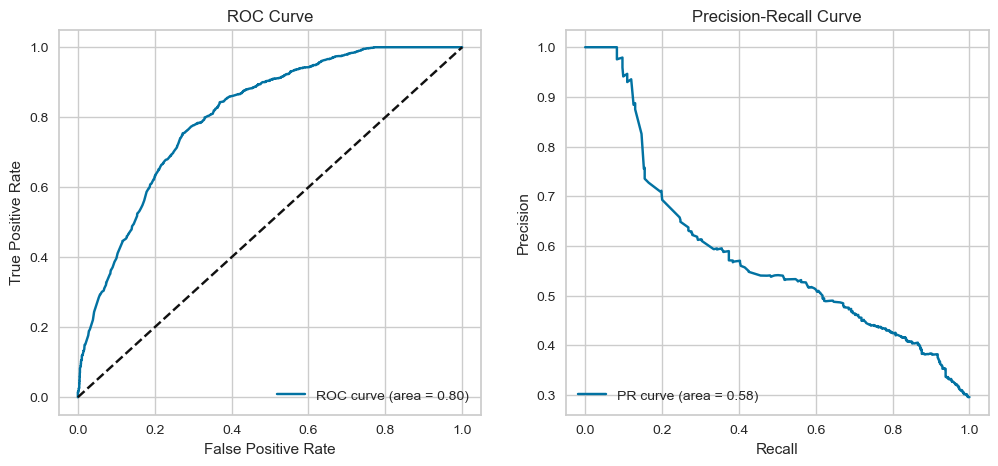

In [140]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Menghitung ROC Curve
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_test, y_pred_proba)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

# Menghitung Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

# Plot ROC Curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Plot Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


__insight__

in summary, the ROC curve suggests that the classifier is performing well overall with an AUC of 0.80. However, the PR curve indicates that there might be challenges with precision and recall balance, given its lower AUC of 0.58, which could be a concern in a dataset with an imbalanced class distribution or in an application where precision is particularly important.

In [141]:

# Perform predictions on the test set as a stand-in for a validation set
y_pred_valid = lgbm_model.predict(X_test)
y_pred_proba_valid = lgbm_model.predict_proba(X_test)[:, 1]

# Evaluating the model on the validation set
accuracy_valid = accuracy_score(y_test, y_pred_valid)
classification_rep_valid = classification_report(y_test, y_pred_valid)
conf_matrix_valid = confusion_matrix(y_test, y_pred_valid)
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_test, y_pred_proba_valid)
roc_auc_valid = auc(fpr_valid, tpr_valid)

print(accuracy_valid) 
print(classification_rep_valid) 
print(conf_matrix_valid)
print(roc_auc_valid)


0.777319587628866
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1456
           1       0.61      0.29      0.40       484

    accuracy                           0.78      1940
   macro avg       0.71      0.62      0.63      1940
weighted avg       0.75      0.78      0.75      1940

[[1366   90]
 [ 342  142]]
0.7979179910998093


## unseen data


In [142]:

# Fit the model on the full dataset
lgbm_model.fit(X_test, y_test)

# The model is now trained on all the available data



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 484, number of negative: 1456
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 1940, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.249485 -> initscore=-1.101363
[LightGBM] [Info] Start training from score -1.101363


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=None, num_leaves=31, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

## before after accuracy of model

In [143]:
print(accuracy_lgbm)
print(best_score)


0.777319587628866
0.8193561907089434


There is an increase about 4 percent of the model. 

## feature importance

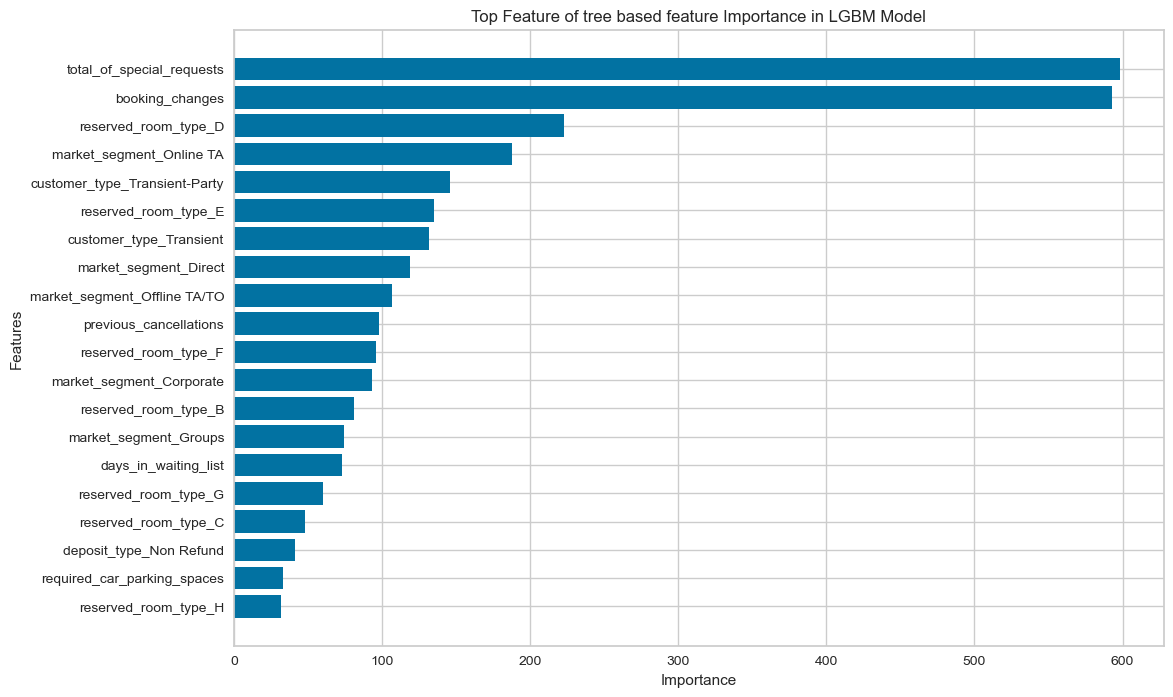

In [152]:
import matplotlib.pyplot as plt
import numpy as np

# Misalkan gbm_model adalah model GBM Anda
feature_importances = lgbm_model.feature_importances_
feature_names = X_train.columns  # Sesuaikan dengan nama fitur dataset Anda

# Urutkan feature importance dan cocokkan dengan nama fitur
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_idx]
sorted_features = feature_names[sorted_idx]

# Jumlah fitur yang akan ditampilkan (misalnya 20 fitur teratas)
n_top_features = 20

# Buat plot batang yang lebih besar
plt.figure(figsize=(12, 8))
plt.barh(sorted_features[:n_top_features], sorted_importances[:n_top_features], align='center')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top Feature of tree based feature Importance in LGBM Model')
plt.gca().invert_yaxis()  # Invers urutan fitur
plt.show()


__insight__

The bar chart  likely shows the gain-based feature importance, which means that features like total_of_special_requests and booking_changes contribute significantly to the model's decisions, while features like reserved_room_type_H have a smaller impact.

In [148]:
print(classification_rep_lgbm)
print(conf_matrix_lgbm)

              precision    recall  f1-score   support

           0       0.80      0.94      0.86      1456
           1       0.61      0.29      0.40       484

    accuracy                           0.78      1940
   macro avg       0.71      0.62      0.63      1940
weighted avg       0.75      0.78      0.75      1940

[[1366   90]
 [ 342  142]]


These are the final outcome

# conclusion
0= is cancelled
1= is not cancelled

based on the recall we get that it has 94 percent score that is not interested and 29 percent that is interested. this is very interesting because the model seems able to determine the 94 percent of people who will cancel the booking

for the precision, this model has 80 percent for cancelled and 61 percent that is not cancelled. this means the prediction can determine true positives of people for about 8 percent. 

we will make a case example for this model. Based on the information from [external data](https://www.budgetyourtrip.com/hotels/portugal-PT#:~:text=The%20average%20hotel%20price%20in,days%20in%20Portugal%20is%20%24296) the average price is 99 dollars. If we have 200 customers with half of them cancelled the booking, then the profit we will get:

1. Without the model

full profit= 99 * 200 = 18800

cancelled customer= 99* 100 = 9900

net profit= 9900 dollars

2. With the model

full profit 99* 200= 19800

cancelled customer= 99* 6= 594

net profit= 19800 -594= 19206

The model increases our profit significantly by predicting the amount of booking that is not cancelled. 
# Recommendation
1.	Adding unique ID for the customers so we can get more data and decreasing amount of duplicates
2.	Also, adding more columns that describe  what kind of special request time of booking change. 
3.	After adding more columns, we can  try modelling all of them back and use other methods such as resampling.
4.	Fix the AUC curve so it has better shape. 
5. make the learning curve look more convergence and keep it out of underfitting or overfitting.


# DEPLOYMENT

In [151]:
import pickle

# Assuming `model` is your trained machine learning model
model = lgbm_model

# Save the model to a file
with open('Hotel_Booking_predictor.pkl', 'wb') as file:
    pickle.dump(model, file)
